In [34]:
from collections import defaultdict, OrderedDict
import random
import matplotlib.pyplot as plt

FULL_POT_SIZE = 1

In [35]:
def run_coffe_simulation(amounts):
    emp_nums = list(range(len(amounts)))
    random.shuffle(emp_nums)
    
    result = defaultdict(float)
    
    coffee_remaining = FULL_POT_SIZE

    for emp in emp_nums:
        coffee_remaining -= amounts[emp]
        if coffee_remaining < 0:
            coffee_remaining = FULL_POT_SIZE
        else:
            result[emp] = amounts[emp]
        
    return result

In [36]:
def limit(input, lower_limit=0, upper_limit=1):
    return max(lower_limit, min(upper_limit, input))

In [39]:
def run_simulations(amounts, num_simulations):
    cumul   = {num:0 for num in range(len(amounts))}
    count   = {num:0 for num in range(len(amounts))}
    
    for _ in range(num_simulations):
        sim_result = run_coffe_simulation(amounts)
        for k,v in sim_result.items():
            cumul[k] += v
            count[k] += 1
    
    cumul_norm = {amounts[k]:v/num_simulations for k,v in cumul.items()}
    count_norm = {amounts[k]:v/num_simulations for k,v in count.items()}
    
    return cumul_norm, count_norm

In [226]:
def plot_results(cumul_norm, count_norm, amounts):
    fig, axes = plt.subplots(3, sharex=True, figsize=(8, 12))
    
    for a in axes:
        a.grid(which='major', linestyle='-', linewidth='0.5')
    
    axes[0].set_xlim([0, 1])
    
    axes[0].hist(list(amounts.values()), bins=20, range=(0,1), normed=True, edgecolor='black')
    axes[0].set_ylabel('Likelihood of Amount')
    
    axes[1].scatter(*zip(*cumul_norm.items()), alpha=0.05)
    axes[1].set_ylabel('Average Amount Received')
    
    axes[2].scatter(*zip(*count_norm.items()), alpha=0.05)
    axes[2].set_ylabel('Percent of Trips Able to Fill')
    axes[2].set_xlabel('Attempted Fill Amount')

    
    fig.subplots_adjust(hspace=.05)
    plt.show()
    
    fig, ax = plt.subplots(figsize=(8, 4))
    data = [(a,r) for a,r in cumul_norm.items() if a>=0.8]
    ax.scatter(*zip(*data), alpha=0.2)
    ax.set_ylabel('Average Amount Received')
    ax.set_xlabel('Attempted Fill Amount')    
    ax.set_xlim([0.8, 1])
    plt.show()

In [150]:
NUM_EMPLOYEES = 2000
NUM_SIMULATIONS = 10000

In [151]:
AMOUNTS_UNIFORM = {num:random.uniform(0,1) for num in range(NUM_EMPLOYEES)}

cumul_norm_uniform, count_norm_uniform = run_simulations(AMOUNTS_UNIFORM, NUM_SIMULATIONS)

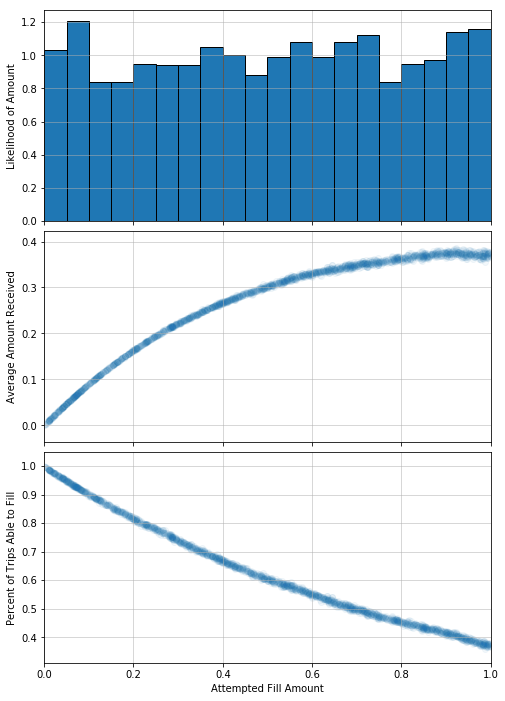

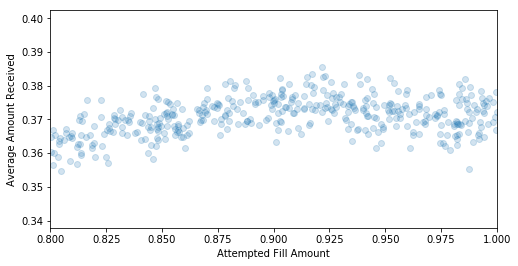

In [227]:
plot_results(cumul_norm_uniform, count_norm_uniform, AMOUNTS_UNIFORM)

In [182]:
AMOUNTS_NORMAL = {num:limit(random.normalvariate(.7,.15)) for num in range(NUM_EMPLOYEES)}

cumul_norm_normal, count_norm_normal = run_simulations(AMOUNTS_NORMAL, NUM_SIMULATIONS)

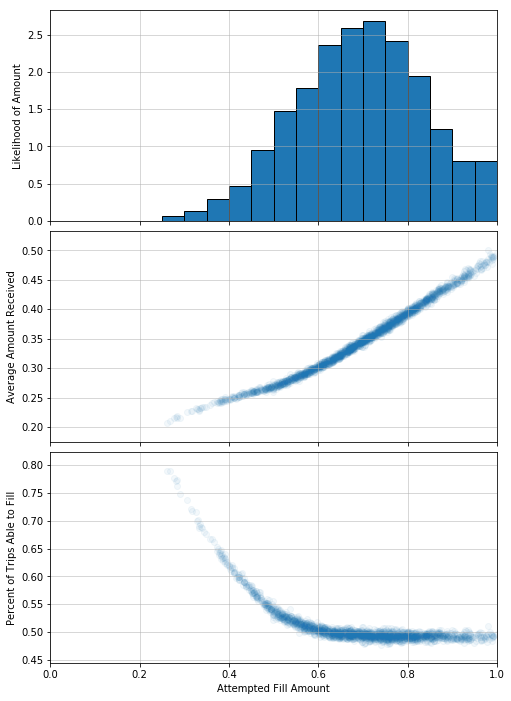

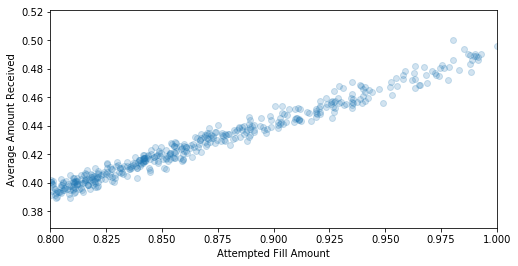

In [228]:
plot_results(cumul_norm_normal, count_norm_normal, AMOUNTS_NORMAL)

In [186]:
AMOUNTS_V_HIGH = {num:limit(random.betavariate(5,1)) for num in range(NUM_EMPLOYEES)}

cumul_norm_v_high, count_norm_v_high = run_simulations(AMOUNTS_V_HIGH, NUM_SIMULATIONS)

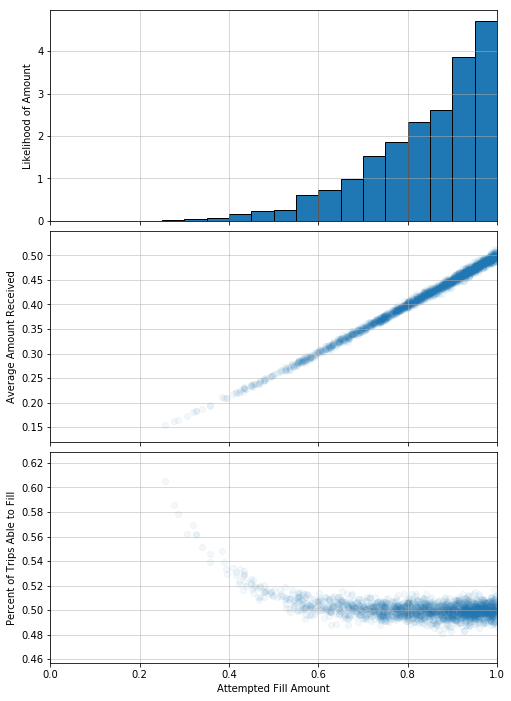

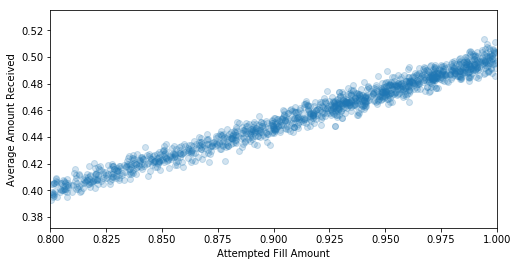

In [230]:
plot_results(cumul_norm_v_high, count_norm_v_high, AMOUNTS_V_HIGH)

In [190]:
AMOUNTS_UNI_HIGH = {num:random.uniform(.7,1) for num in range(NUM_EMPLOYEES)}

cumul_norm_uni_high, count_norm_uni_high = run_simulations(AMOUNTS_UNI_HIGH, NUM_SIMULATIONS)

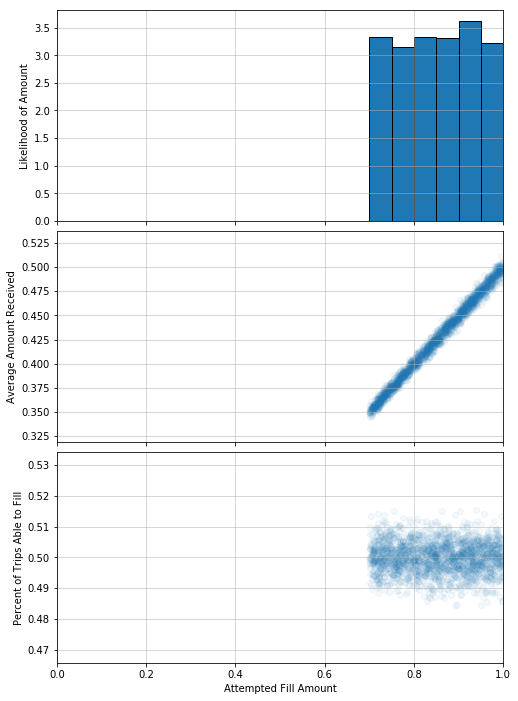

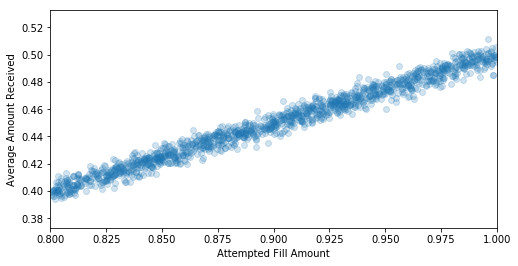

In [229]:
plot_results(cumul_norm_uni_high, count_norm_uni_high, AMOUNTS_UNI_HIGH)